In [18]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# 데이터를 pandas dataframe으로 불러온다
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# print(train.head())


In [19]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
# 각 Column들의 데이터 종류를 확인한다
for col in train_df:
    print(train_df[col].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

McGowan, Miss. Anna "Annie"                1
Hakkarainen, Mr. Pekka Pietari             1
Nakid, Mr. Sahid                           1
Myhrman, Mr. Pehr Fabian Oliver Malkolm    1
Blackwell, Mr. Stephen Weart               1
                                          ..
Cacic, Mr. Luka                            1
Barbara, Miss. Saiide                      1
Ilett, Miss. Bertha                        1
West, Mr. Edwy Arthur                      1
Chambers, Mr. Norman Campbell              1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int

In [21]:
# NaN값이 들어있는 columns를 확인한다
train_df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# 크게 관련 없는 columns를 삭제한다
# Ticket, Fare, Cabin, PasengerId
train = train_df.drop(["Ticket", "Fare", "Cabin", "PassengerId", "Name"], axis=1, )
test = test_df.drop(["Ticket", "Fare", "Cabin", "PassengerId", "Name"], axis=1, )

* Age값에 Nan값이 꽤 많이 들어 있는 것으로 보인다
* 일단은 Train Data의 평균을 이용해서 NaN 값을 채우는 것이 좋아보인다
* 데이터의 통일성을 위해 Test Data 또한 Train Data의 Mean 값을 이용해 보간한다.

In [23]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
test["Age"].fillna(train["Age"].mean(), inplace=True)


In [25]:
# 넘파이배열로 변환
train = train.values
test = test.values
set = [train,test]

In [26]:
# male, female 값을 각각 0과 1로 인코딩한다
sex_i = 3
embark_i = 7
for data in set:
    sex_i -= 1
    embark_i -= 1
    for i in range(data.shape[0]):
        if data[i,sex_i] == 'male' :
            data[i,sex_i] = 0
        else :
            data[i,sex_i] = 1
        if data[i,embark_i] == 'S':
            data[i,embark_i] = 0
        elif data[i,embark_i] == 'Q':
            data[i,embark_i] = 1
        else :
            data[i,embark_i] = 2

In [27]:
train = train.astype(np.float64)
test = test.astype(np.float64)

한 sample은 총 6개의 feature를 가지고 있다.

3개의 Fully Connected Layer를 이용한 신경망을 이용해보자


In [ ]:
# 훈련용 변수와 정답 레이블을 분리한다
x_train = train[:,1:]
y_train = train[:,0]

In [29]:
# keras모델 설계
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["binary_accuracy"])



In [30]:
history = model.fit(
    x_train, y_train, epochs=200, batch_size=20, validation_split=0.2, shuffle = True, verbose=1
)

history_dict = history.history
history_dict.keys()

============] - 1s 32ms/step - loss: 0.4824 - binary_accuracy: 0.7978 - val_loss: 0.3886 - val_binary_accuracy: 0.8492
Epoch 75/200
36/36 [==============================] - 1s 16ms/step - loss: 0.5030 - binary_accuracy: 0.7935 - val_loss: 0.3832 - val_binary_accuracy: 0.8547
Epoch 76/200
36/36 [==============================] - 1s 16ms/step - loss: 0.4986 - binary_accuracy: 0.7978 - val_loss: 0.3831 - val_binary_accuracy: 0.8547
Epoch 77/200
36/36 [==============================] - 0s 13ms/step - loss: 0.5009 - binary_accuracy: 0.7739 - val_loss: 0.3948 - val_binary_accuracy: 0.8492
Epoch 78/200
36/36 [==============================] - 1s 16ms/step - loss: 0.4922 - binary_accuracy: 0.7879 - val_loss: 0.3875 - val_binary_accuracy: 0.8492
Epoch 79/200
36/36 [==============================] - 0s 10ms/step - loss: 0.4822 - binary_accuracy: 0.7837 - val_loss: 0.3847 - val_binary_accuracy: 0.8547
Epoch 80/200
36/36 [==============================] - 1s 37ms/step - loss: 0.4731 - binary_accur

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

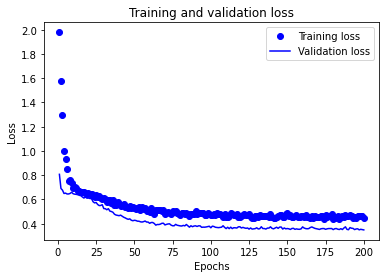

In [31]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

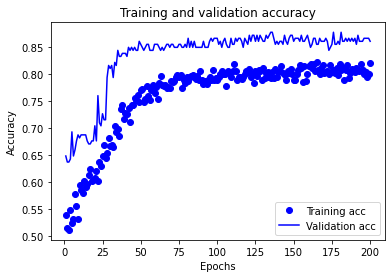

In [32]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
result = model.predict(test)
result = result.reshape(418)
# result.shape



In [34]:
my_submission = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': result})
my_submission.to_csv('submission.csv', index=False)